import delle librerie utilizzate

In [17]:
import pandas as pd
import numpy as np
from PIL import Image
from natsort import natsorted, natsort_keygen
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [18]:
op=0

In [2]:
data_path= os.path.join(r'C:\Users\Federico Cocchi\UNIMORE\3° SEMESTRE\covid-hackathon\TrainSet', r'trainClinData.xls')

In [3]:
df= pd.read_excel(data_path)
print(df.shape)
df.head(5)

(1103, 40)


,Row_number,ImageFile,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,...,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death
0,82,P_102.png,A,72.000000,1,1.0,37.3,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,SEVERE,0
1,228,P_131.png,D,35.913889,0,1.0,39.3,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,MILD,0
2,229,P_132.png,D,57.266667,0,1.0,37.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,MILD,0
3,96,P_117.png,A,39.000000,1,1.0,37.2,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MILD,0
4,112,P_16.png,A,44.000000,0,1.0,38.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SEVERE,0


Ordinato il dataset seguendo lo stesso ordine delle immagine nella directory su esplora risorse

In [4]:
df_order= df.sort_values(by=['ImageFile'], key= natsort_keygen())
df_order.reset_index(inplace=True, drop=True)
df_order.head(5)

,Row_number,ImageFile,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,...,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death
0,1,P_1.png,A,38.0,0,1.0,36.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MILD,0
1,900,P_1_1.png,F,96.0,0,1.0,36.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,MILD,0
2,901,P_1_2.png,F,62.0,1,1.0,NaN,4.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,NaN,1.0,MILD,0
3,902,P_1_3.png,F,57.0,1,1.0,39.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,1.0,SEVERE,0
4,903,P_1_4.png,F,41.0,1,1.0,NaN,NaN,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,SEVERE,0


In [24]:
natsorted(df.ImageFile)

['P_1.png',
 'P_1_1.png',
 'P_1_2.png',
 'P_1_3.png',
 'P_1_4.png',
 'P_1_5.png',
 'P_1_6.png',
 'P_1_7.png',
 'P_1_8.png',
 'P_1_9.png',
 'P_1_10.png',
 'P_1_11.png',
 'P_1_12.png',
 'P_1_13.png',
 'P_1_14.png',
 'P_1_15.png',
 'P_1_16.png',
 'P_1_17.png',
 'P_1_18.png',
 'P_1_19.png',
 'P_1_20.png',
 'P_1_21.png',
 'P_1_22.png',
 'P_1_23.png',
 'P_1_24.png',
 'P_1_25.png',
 'P_1_26.png',
 'P_1_27.png',
 'P_1_28.png',
 'P_1_29.png',
 'P_1_30.png',
 'P_1_31.png',
 'P_1_32.png',
 'P_1_33.png',
 'P_1_34.png',
 'P_1_35.png',
 'P_1_36.png',
 'P_1_37.png',
 'P_1_38.png',
 'P_1_39.png',
 'P_1_40.png',
 'P_1_41.png',
 'P_1_42.png',
 'P_1_43.png',
 'P_1_44.png',
 'P_1_45.png',
 'P_1_46.png',
 'P_1_47.png',
 'P_1_48.png',
 'P_1_49.png',
 'P_1_50.png',
 'P_1_51.png',
 'P_1_52.png',
 'P_1_53.png',
 'P_1_54.png',
 'P_1_55.png',
 'P_1_56.png',
 'P_1_57.png',
 'P_1_58.png',
 'P_1_59.png',
 'P_1_60.png',
 'P_1_61.png',
 'P_1_62.png',
 'P_1_63.png',
 'P_1_64.png',
 'P_1_65.png',
 'P_1_66.png',
 'P_1_6

In [33]:
df_order.to_excel('Train_order.xlsx')

## 1.1 Image classification

In [5]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision.models.resnet import model_urls
import torchvision


In [6]:
transf_loader = A.Compose([
    A.Resize(224, 224),
    ToTensorV2(),
    # transforms.Normalize([0.5], [0.5])
])

def process_im(img, th=150):
    if type(img[0, 0]) != np.uint8:
        img = np.array((img * 255 / np.max(img)), dtype=np.uint8)

    if np.mean(img) <= th:
        img = img * -1 + 255

    return img

class custom_dataset(Dataset):
    def __init__(self, root_dir, transform=transf_loader, excel_file=None):
        self.dataframe = pd.read_excel(excel_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return self.dataframe.shape[0]

    def __getitem__(self, index):
        name_image = self.dataframe['ImageFile'][index]
        img_name = os.path.join(self.root_dir, name_image)

        onehot_label = self.dataframe['Prognosis'].astype('category').cat.codes
        onehot_label_float = torch.tensor(onehot_label, dtype=torch.long)
        label = onehot_label_float[index]
        #print('prova', self.dataframe['Prognosis'][10])
        #print(onehot_label_float[10])

        img = np.array(Image.open(img_name))  # data augmentation
        img = process_im(img)
        img = self.transform(image=img)['image']
        return img, label, name_image

In [7]:
dataset = custom_dataset(excel_file=r'Train_order.xlsx',
                         root_dir=r'C:\Users\Federico Cocchi\UNIMORE\3° SEMESTRE\covid-hackathon\TrainSet\TrainSet',
                         transform=transf_loader)
print(len(dataset))

1103


In [8]:
eval_loader = DataLoader(dataset, batch_size=32, shuffle=False)

Load the model

In [9]:
print('Load the model')
model_urls['resnet101'] = model_urls['resnet101'].replace('https://', 'http://')
model = torchvision.models.resnet101(pretrained=True)
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3),
                              bias=False)  # 1 channel in input image
num = model.fc.in_features  # 512
model.fc = torch.nn.Linear(num, 1)

print(num)
# summary(model, (1,224,224))

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

Load the model
2048


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Load the weights

In [10]:
model.load_state_dict(torch.load('model.pth', map_location= device))

<All keys matched successfully>

Evaluation

In [17]:
correct = 0
total = 0
y_true= []
y_pred= []
image_names= []

with torch.no_grad():
    model.eval()
    for data in eval_loader:
        images, labels, names = data
        outputs = model(images.float())

        # provato ad applicare anche il softmax --> stesso risultato
        predicted_soft= torch.where(torch.sigmoid(outputs)>0.5, 1, 0)

        predicted = torch.where(outputs>0.5, 1, 0)
        total += labels.size(0)
        correct += (predicted.squeeze() == labels).sum().item()

        for i in range(labels.size(0)):
            y_true.append(labels[i])
            y_pred.append(predicted.squeeze()[i].item())
            image_names.append(names[i])

In [18]:
print('Dimension', total)
print('accuracy: %d' % (100 * correct // total) + '%')

Dimension 1103
accuracy: 95%


In [19]:
df_mom = pd.DataFrame(list(zip(image_names, y_pred)), columns=['image_name', 'pred_class'])
df_mom.head(10)

,image_name,pred_class
0,P_1.png,0
1,P_1_1.png,0
2,P_1_2.png,0
3,P_1_3.png,1
4,P_1_4.png,1
5,P_1_5.png,0
6,P_1_6.png,1
7,P_1_7.png,0
8,P_1_8.png,0
9,P_1_9.png,0


In [24]:
df_order.head()

,Row_number,ImageFile,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,...,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death,pred_class
0,1,P_1.png,A,38.0,0,1.0,36.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MILD,0,0
1,900,P_1_1.png,F,96.0,0,1.0,36.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,1.0,MILD,0,0
2,901,P_1_2.png,F,62.0,1,1.0,NaN,4.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,NaN,1.0,MILD,0,0
3,902,P_1_3.png,F,57.0,1,1.0,39.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,NaN,1.0,SEVERE,0,1
4,903,P_1_4.png,F,41.0,1,1.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,SEVERE,0,1


In [21]:
df_order['pred_class']= df_mom.pred_class

In [23]:
df_order.to_excel('Train_order_imagEval.xlsx')

### Load the csv with data

In [19]:
df_order= pd.read_excel(r'Train_order_imagEval.xlsx', index_col=0)
print(df_order.shape) # 1103, 41
df_order.head(5)

(1103, 41)


,Row_number,ImageFile,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,...,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death,pred_class
0,1,P_1.png,A,38.0,0,1.0,36.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MILD,0,0
1,900,P_1_1.png,F,96.0,0,1.0,36.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,1.0,MILD,0,0
2,901,P_1_2.png,F,62.0,1,1.0,NaN,4.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,NaN,1.0,MILD,0,0
3,902,P_1_3.png,F,57.0,1,1.0,39.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,NaN,1.0,SEVERE,0,1
4,903,P_1_4.png,F,41.0,1,1.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,SEVERE,0,1


## 1.2 y e dt

In [20]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(df_order.Prognosis)
le.classes_

array(['MILD', 'SEVERE'], dtype=object)

In [21]:
y.shape

(1103,)

In [22]:
df_order.drop(['Row_number', 'Death', 'Prognosis', 'ImageFile', 'Hospital'], axis=1 , inplace=True)

In [23]:
mean_value= []
for i in range(df_order.shape[1]):
    mean= df_order.iloc[:,i].mean()
    mean_value.append(mean)

values= {}

for counter, value in enumerate(df_order.keys()):
    values[value] = mean_value[counter]
print(values)

{'Age': 64.60143328786812, 'Sex': 0.34632819582955576, 'PositivityAtAdmission': 0.9577067669172933, 'Temp_C': 37.55185577942736, 'DaysFever': 2.7229336437718277, 'Cough': 0.5227686703096539, 'DifficultyInBreathing': 0.5050045495905369, 'WBC': 7.100423848363599, 'RBC': 4.5722008041627245, 'CRP': 33.48366383380547, 'Fibrinogen': 602.5183823529412, 'Glucose': 124.8172757475083, 'PCT': 55.79216517857144, 'LDH': 362.63046153846153, 'INR': 1.3737686998504013, 'D_dimer': 2532.160158227848, 'Ox_percentage': 92.63477672530448, 'PaO2': 72.32052821128451, 'SaO2': 92.44488372093024, 'PaCO2': 33.402253694581276, 'pH': 7.457315721649485, 'CardiovascularDisease': 0.29979253112033194, 'IschemicHeartDisease': 0.13872135102533173, 'AtrialFibrillation': 0.08220603537981269, 'HeartFailure': 0.020833333333333332, 'Ictus': 0.035416666666666666, 'HighBloodPressure': 0.458592132505176, 'Diabetes': 0.15527950310559005, 'Dementia': 0.04569055036344756, 'BPCO': 0.06935817805383022, 'Cancer': 0.07349896480331262,

In [24]:
df_order= df_order.fillna(value=values)
df_order.head()

,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,CRP,...,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,pred_class
0,38.0,0,1.0,36.000000,4.000000,1.0,0.0,4.29,4.74,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0
1,96.0,0,1.0,36.000000,1.000000,0.0,0.0,8.80,4.16,8.77,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.110294,1.0,0
2,62.0,1,1.0,37.551856,4.000000,1.0,0.0,8.90,3.02,0.60,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.110294,1.0,0
3,57.0,1,1.0,39.000000,2.000000,0.0,0.0,9.10,3.32,12.51,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.110294,1.0,1
4,41.0,1,1.0,37.551856,2.722934,0.0,0.0,7.90,3.61,15.79,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.110294,1.0,1


In [25]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1102
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1103 non-null   float64
 1   Sex                    1103 non-null   int64  
 2   PositivityAtAdmission  1103 non-null   float64
 3   Temp_C                 1103 non-null   float64
 4   DaysFever              1103 non-null   float64
 5   Cough                  1103 non-null   float64
 6   DifficultyInBreathing  1103 non-null   float64
 7   WBC                    1103 non-null   float64
 8   RBC                    1103 non-null   float64
 9   CRP                    1103 non-null   float64
 10  Fibrinogen             1103 non-null   float64
 11  Glucose                1103 non-null   float64
 12  PCT                    1103 non-null   float64
 13  LDH                    1103 non-null   float64
 14  INR                    1103 non-null   float64
 15  D_di

split part

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_order, y, test_size=0.1, random_state=2,
                                                    shuffle=False)

models

In [27]:
dummy= DummyClassifier()
dummy.fit(X_train, y_train)

pred_test= dummy.predict(X_test)
print('test: ', accuracy_score(y_test, pred_test) )

test:  0.5765765765765766


scegliere i parametri migliori

In [11]:
dt= DecisionTreeClassifier()
par= {
    'criterion' : ('giny','entropy'),
    'max_features' : [1, 5, 10, None],
    'min_samples_split' : [1, 2, 5]

}

sear= GridSearchCV(dt, par, cv=5, scoring='accuracy')
sear.fit(X_train, y_train)
sear.best_params_

C:\Anaconda\envs\hackathon\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\envs\hackathon\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\envs\hackathon\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Anaconda\envs\hackathon\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a flo

{'criterion': 'entropy', 'max_features': None, 'min_samples_split': 5}

In [28]:
# **sear.best_params_
dt= DecisionTreeClassifier(criterion='entropy', max_features=None, min_samples_split=5)
dt.fit(X_train, y_train)

pred_test= dt.predict(X_test)
print('test: ', accuracy_score(y_test, pred_test) )

test:  0.918918918918919


In [15]:
randomforest= RandomForestClassifier()
par= {
    'n_estimators' : [100, 1000, 2000, 5000],
    'criterion' : ('giny','entropy'),
    'max_features' : [1, 5, 10, None],
    'min_samples_split' : [1, 2, 5]

}

sear= GridSearchCV(randomforest, par, cv=5, scoring='accuracy')
sear.fit(X_train, y_train)
sear.best_params_

C:\Anaconda\envs\hackathon\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\envs\hackathon\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\envs\hackathon\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Anaconda\envs\hackathon\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\envs\hackathon\lib\sit

{'criterion': 'entropy',
 'max_features': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [30]:
# **sear.best_params_
randomforest= RandomForestClassifier(n_estimators=1000)
# criterion='entropy', max_features=10, min_samples_split=2, n_estimators=100
randomforest.fit(X_train, y_train)

pred_test= randomforest.predict(X_test)
print('test: ', accuracy_score(y_test, pred_test) )

test:  0.963963963963964


In [16]:
extra= ExtraTreeClassifier()
extra.fit(X_train, y_train)

pred_test= extra.predict(X_test)
print('test: ', accuracy_score(y_test, pred_test) )

test:  0.9459459459459459


In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
confusion_matrix(y_test, pred_test)
TPR= tp/(tp+fn)
TNR= tn/(tn+fp)
print(TPR, TNR)
print('final result:', (TPR+TNR)/2)

0.96875 0.9574468085106383
final result: 0.9630984042553192


[Text(0.5097384982638888, 0.9666666666666667, 'RespiratoryFailure <= 0.5\ngini = 0.499\nsamples = 992\nvalue = [471, 521]\nclass = SEVERE'),
 Text(0.4138997395833333, 0.9, 'Row_number <= 92.5\ngini = 0.113\nsamples = 481\nvalue = [452, 29]\nclass = MILD'),
 Text(0.3555772569444444, 0.8333333333333334, 'Fibrinogen <= 354.5\ngini = 0.103\nsamples = 476\nvalue = [450, 26]\nclass = MILD'),
 Text(0.2805989583333333, 0.7666666666666667, 'DifficultyInBreathing <= 479.25\ngini = 0.063\nsamples = 402\nvalue = [389, 13]\nclass = MILD'),
 Text(0.2667100694444444, 0.7, 'Age <= 39.9\ngini = 0.058\nsamples = 401\nvalue = [389, 12]\nclass = MILD'),
 Text(0.2528211805555556, 0.6333333333333333, 'PCT <= 2961.5\ngini = 0.053\nsamples = 400\nvalue = [389, 11]\nclass = MILD'),
 Text(0.1792534722222222, 0.5666666666666667, 'Fibrinogen <= 322.5\ngini = 0.045\nsamples = 392\nvalue = [383, 9]\nclass = MILD'),
 Text(0.07378472222222222, 0.5, 'DaysFever <= 2.695\ngini = 0.033\nsamples = 354\nvalue = [348, 6]\nc

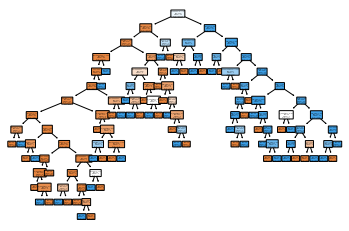

In [37]:
plot_tree(dt,
          feature_names = df.columns[:],
          class_names=['MILD', 'SEVERE'],
          rounded=True,
          filled = True)

In [ ]:
# da eseguire su Colab
'''
viz = dtreeviz(dt,
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=df.columns[:],
               class_names=['MILD', 'SEVERE'],
               title="Decision Tree")
viz
'''

## 1.3 merge 2 dt

Ripartire aprendo di nuovo i dati e seguendo il codice utilizzato prima

In [16]:
df_order= pd.read_excel(r'Train_order_imagEval.xlsx', index_col=0)
print(df_order.shape) # 1103, 41
df_order.head(5)

(1103, 41)


,Row_number,ImageFile,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,...,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death,pred_class
0,1,P_1.png,A,38.0,0,1.0,36.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MILD,0,0
1,900,P_1_1.png,F,96.0,0,1.0,36.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,1.0,MILD,0,0
2,901,P_1_2.png,F,62.0,1,1.0,NaN,4.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,NaN,1.0,MILD,0,0
3,902,P_1_3.png,F,57.0,1,1.0,39.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,NaN,1.0,SEVERE,0,1
4,903,P_1_4.png,F,41.0,1,1.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,SEVERE,0,1


In [17]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(df_order.Prognosis)
le.classes_

array(['MILD', 'SEVERE'], dtype=object)

In [18]:
y.shape

(1103,)

In [19]:
df_order.drop(['Row_number', 'Death', 'Prognosis', 'ImageFile', 'Hospital'], axis=1 , inplace=True)

In [20]:
mean_value= []
for i in range(df_order.shape[1]):
    mean= df_order.iloc[i].mean()
    mean_value.append(mean)

values= {}

for counter, value in enumerate(df_order.keys()):
    values[value] = mean_value[counter]
print(values)

{'Age': 9.918571428571427, 'Sex': 695.0230303030304, 'PositivityAtAdmission': 41.838928571428575, 'Temp_C': 34.01285714285715, 'DaysFever': 306.0446153846154, 'Cough': 19.341481481481484, 'DifficultyInBreathing': 2021.768947368421, 'WBC': 26.646785714285716, 'RBC': 50.385, 'CRP': 37.056774193548385, 'Fibrinogen': 50.990833333333335, 'Glucose': 37.181851851851846, 'PCT': 223.83222222222224, 'LDH': 38.33, 'INR': 141.8551612903226, 'D_dimer': 85.64096774193548, 'Ox_percentage': 49.87655172413793, 'PaO2': 27.102962962962962, 'SaO2': 116.33107142857143, 'PaCO2': 13.882608695652175, 'pH': 21.68857142857143, 'CardiovascularDisease': 31.10896551724138, 'IschemicHeartDisease': 39.98096774193548, 'AtrialFibrillation': 62.74827586206897, 'HeartFailure': 15.463076923076922, 'Ictus': 31.224687499999998, 'HighBloodPressure': 114.20875000000001, 'Diabetes': 12.686153846153845, 'Dementia': 17.0051724137931, 'BPCO': 18.22769230769231, 'Cancer': 7.655, 'ChronicKidneyDisease': 45.266666666666666, 'Respir

In [21]:
df_order= df_order.fillna(value=values)
df_order.head(5)

,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,CRP,...,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,pred_class
0,38.0,0,1.0,36.000000,4.000000,1.0,0.0,4.29,4.74,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0
1,96.0,0,1.0,36.000000,1.000000,0.0,0.0,8.80,4.16,8.77,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,60.487931,1.0,0
2,62.0,1,1.0,34.012857,4.000000,1.0,0.0,8.90,3.02,0.60,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,60.487931,1.0,0
3,57.0,1,1.0,39.000000,2.000000,0.0,0.0,9.10,3.32,12.51,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,60.487931,1.0,1
4,41.0,1,1.0,34.012857,306.044615,0.0,0.0,7.90,3.61,15.79,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,60.487931,1.0,1


In [22]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1102
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1103 non-null   float64
 1   Sex                    1103 non-null   int64  
 2   PositivityAtAdmission  1103 non-null   float64
 3   Temp_C                 1103 non-null   float64
 4   DaysFever              1103 non-null   float64
 5   Cough                  1103 non-null   float64
 6   DifficultyInBreathing  1103 non-null   float64
 7   WBC                    1103 non-null   float64
 8   RBC                    1103 non-null   float64
 9   CRP                    1103 non-null   float64
 10  Fibrinogen             1103 non-null   float64
 11  Glucose                1103 non-null   float64
 12  PCT                    1103 non-null   float64
 13  LDH                    1103 non-null   float64
 14  INR                    1103 non-null   float64
 15  D_di

separare i due alberi

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_order, y, test_size=0.1, random_state=2,
                                                    shuffle=False)

In [28]:
X_train.head(5)

,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,CRP,...,Ictus,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position
567,71.000000,0,0.0,37.7,1.000000,0.0,0.0,6.96,5.14,71.60,...,1.000000,1.00000,1.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1039,58.000000,1,1.0,36.3,4.000000,1.0,1.0,6.60,4.30,2.78,...,0.000000,1.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1020,48.000000,0,1.0,37.0,4.000000,1.0,1.0,5.39,4.54,12.06,...,0.000000,1.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,60.487931,1.000000
970,80.000000,1,1.0,37.0,306.044615,0.0,1.0,5.60,4.43,8.02,...,0.000000,1.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
284,80.197125,1,1.0,36.5,306.044615,0.0,1.0,3.42,3.84,5.74,...,31.224687,114.20875,12.686154,17.005172,18.227692,7.655,45.266667,57.230606,60.487931,18.104828


In [29]:
X_test.head(5)

,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,CRP,...,Ictus,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position
287,52.000000,0,1.0,38.3,2.000000,1.0,1.0,3.47,6.05,1.12,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
738,78.000000,0,1.0,38.1,4.000000,0.0,0.0,5.00,3.87,13.21,...,0.000000,1.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
440,89.000000,1,0.0,38.5,1.000000,0.0,1.0,26.63,2.90,344.50,...,0.000000,1.00000,1.000000,0.000000,1.000000,0.000,0.000000,57.230606,60.487931,1.000000
197,71.466119,1,1.0,36.8,306.044615,0.0,1.0,8.67,3.49,0.57,...,31.224687,114.20875,12.686154,17.005172,18.227692,7.655,45.266667,57.230606,60.487931,18.104828
263,79.392197,0,1.0,37.9,306.044615,0.0,1.0,9.96,5.58,15.60,...,31.224687,114.20875,12.686154,17.005172,18.227692,7.655,45.266667,57.230606,60.487931,18.104828


In [26]:
img_pred_class = X_test.pred_class
img_pred_class.shape

(111,)

In [27]:
X_test.drop(['pred_class'], axis=1 , inplace=True)
X_train.drop(['pred_class'], axis=1 , inplace=True)

### primo albero

In [30]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

pred_test= dt.predict(X_test)
print('test: ', accuracy_score(y_test, pred_test) )

test:  0.6126126126126126


In [31]:
df_final = pd.DataFrame(list(zip(img_pred_class, pred_test)), columns=['image_pred', 'dt_pred'])
df_final.head()

,image_pred,dt_pred
0,1,1
1,1,1
2,0,1
3,0,1
4,1,1


In [33]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(df_final, y_test,
                                                            test_size=0.2, random_state=2,
                                                            shuffle=False)

In [34]:
dt= DecisionTreeClassifier()
dt.fit(X_train_f, y_train_f)

pred_test= dt.predict(X_test_f)
print('test: ', accuracy_score(y_test_f, pred_test) )

test:  1.0


In [35]:
randomforest= RandomForestClassifier(n_estimators=1000)
randomforest.fit(X_train, y_train)

pred_test= randomforest.predict(X_test)
print('test: ', accuracy_score(y_test, pred_test) )

test:  0.7837837837837838


In [36]:
df_final = pd.DataFrame(list(zip(img_pred_class, pred_test)), columns=['image_pred', 'dt_pred'])

In [37]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(df_final, y_test,
                                                            test_size=0.2, random_state=2,
                                                            shuffle=False)

In [38]:
randomforest= RandomForestClassifier(n_estimators=1000)
randomforest.fit(X_train_f, y_train_f)

pred_test= randomforest.predict(X_test_f)
print('test: ', accuracy_score(y_test_f, pred_test) )

test:  1.0


In [39]:
pred_test

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0])